# Projet : analyse des impacts environnementaux des services numériques

# INTRODUCTION GENERALE

L'impact environnemental des services numériques, notamment à travers leur empreinte carbone, constitue un enjeu majeur dans un monde de plus en plus connecté. Ce projet vise à analyser et modéliser les relations entre la consommation énergétique, le nombre d'utilisateurs et les émissions de CO2 des services numériques. À l’aide de différentes techniques de machine learning, telles que la régression linéaire, les modèles de classification (KNN) et les méthodes de clustering (K-means et CAH), nous aLLons chercher à identifier les principaux facteurs influençant ces impacts, tout en explorant la pertinence des approches appliquées. Ce travail mettra en lumière les défis liés à la qualité des données et à l'adéquation des modèles, tout en offrant des perspectives pour des analyses futures plus robustes et précises.

# PARTIE 1 : GENERATION DES DONNEES ARTIFICIELLES

In [ ]:

#Cette section n'a plus besoin d'etre " run" parceque nous l'avons déjà fait pour obtenir le fichicer csv.
#Nous ne ferons donc que charger notre fichier csv dans la suite du projet.

import numpy as np
import pandas as pd

np.random.seed(42)  # Pour la reproductibilité
# Liste des services numériques
services_numeriques = [
    "Streaming vidéo", "Recherche sur internet", "Réseaux sociaux", 
    "E-commerce", "Jeux en ligne", "Cloud computing", "Email", 
    "Stockage de fichiers", "Applications de messagerie", "Streaming audio", 
    "Webinaire", "Éducation en ligne", "Publicité en ligne", "Télétravail", 
    "Services bancaires en ligne", "Applications de fitness", 
    "Services de réservation", "Services de livraison", 
    "Services de santé en ligne", "Applications de voyage", 
    "Plateformes de crowdfunding", "Forums en ligne", "Blogs", 
    "Podcasts", "Services de téléphonie"
]

# Génération des données artificielles

data = {
    "Service numérique": services_numeriques,
    "Consommation énergétique (kWh)": np.random.randint(1000, 90000, len(services_numeriques)),  # Entre 1 000 et 90 000 kWh
    "Nombre d'utilisateurs": np.random.randint(50000, 1000000, len(services_numeriques)),  # Entre 50 000 et 1 000 000 utilisateurs
    "Type d'énergie utilisée": np.random.choice(["Renouvelable", "Non-renouvelable"], len(services_numeriques)),
    "Pays": np.random.choice(["France", "UK", "Allemagne", "Canada"], len(services_numeriques)),
    "Émission de CO2 (kg)": np.random.randint(100, 5000, len(services_numeriques))  # Entre 100 et 5 000 kg de CO2
}

# Création du DataFrame
df = pd.DataFrame(data)

# Sauvegarde dans un fichier CSV
df.to_csv("services_numerica.csv", index=False)

print("Le fichier CSV a été généré avec succès.")



# Partie 2 :  ANALYSE DES DONNEES

# Algo 1 : Régression (Prédiction de la quantité de CO2 émise)

## INTRODUCTION

Dans un contexte où la transition énergétique et la réduction des émissions de CO₂ sont au cœur des préoccupations globales, **ce projet vise à prédire la quantité de CO₂ émise par les services numériques**. **À partir de données sur la consommation énergétique totale et le nombre d'utilisateurs, nous utiliserons un modèle de régression linéaire pour établir une relation précise entre ces variables et les émissions de CO₂**. En suivant une méthodologie structurée comprenant la préparation et le nettoyage des données, ainsi que l'évaluation du modèle à l'aide de métriques telles que l'Erreur Quadratique Moyenne (MSE) et le Coefficient de Détermination (R²), ce projet permettra d'optimiser la compréhension et la gestion de l'empreinte carbone des services numériques.

#### Méthode :  
Pour ce faire on va dans un premier temps utiliser la régression linéaire simple pour :
1. Prédire la quantité de CO2 émise en fonction de la consommation totale d'énergie en KWh
2. Prédire la quantité de CO2 émise en fonction du nombre d'utilisateurs


On part donc de l'hypothèse que la consommation énergétique totale a un impact sur la quantité de CO2 énergétique émise et de la même manière la quantité de CO2 émise dépenderaient du nombre d'utilisateurs 

## Importation des bibliothèques nécessaires 


In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Etape 1 : Préparation des données

In [487]:
# Importer le fichier CSV
import pandas as pd
data = pd.read_csv("services_numeriques.csv", index_col=0)

# Afficher les premières lignes du DataFrame
print("Jeu de données :")
data.head()

Jeu de données :


,Service numérique,Consommation énergétique (kWh),Nombre d'utilisateurs,Type d'Energie utilisée,Pays,Émission de CO2 (kg)
1,Streaming vidéo,16795,259795,Renouvelable,France,592
2,Recherche sur internet,1860,487232,Renouvelable,UK,2162
3,Réseaux sociaux,77820,918040,Renouvelable,Allemagne,3984
4,E-commerce,55886,501186,Renouvelable,UK,164
5,Jeux en ligne,7265,157730,Non-renouvelable,Allemagne,2668


In [497]:
# Vérification des colonnes et nettoyage si nécessaire
# Supposons que les colonnes pertinentes s'appellent 'Consommation énergétique (kWh)', 
# 'Nombre d'utilisateurs' et 'Émissions de CO2 (kg)'
data = data[['Consommation énergétique (kWh)', 'Nombre d\'utilisateurs', 'Émission de CO2 (kg)']]
data.head()

,Consommation énergétique (kWh),Nombre d'utilisateurs,Émission de CO2 (kg)
1,16795,259795,592
2,1860,487232,2162
3,77820,918040,3984
4,55886,501186,164
5,7265,157730,2668


Ainsi dans notre dataset nous avons maintenant que les colonnes qui sont la consommation énergétique(variable explicative), nombre d'utilisateurs(variable explicative) et la quantité de CO2 émise(variable à expliquer)

## Etape 2 :  Nettoyage des données 

In [594]:
print(data.describe())  
#La fonction describe nous permet d'avoir quelques statistiques sur nos données 

       Consommation énergétique (kWh)  Nombre d'utilisateurs  \
count                       25.000000              25.000000   
mean                     50586.280000          480079.440000   
std                      28332.269924          277352.134193   
min                       1769.000000           66725.000000   
25%                      29693.000000          274538.000000   
50%                      60735.000000          487232.000000   
75%                      68969.000000          649143.000000   
max                      88498.000000          954277.000000   

       Émission de CO2 (kg)  
count             25.000000  
mean            2621.920000  
std             1416.978914  
min              164.000000  
25%             1670.000000  
50%             2790.000000  
75%             3661.000000  
max             4975.000000  


In [505]:
data.isnull().sum()
#Vérification des données manquantes

Consommation énergétique (kWh)    0
Nombre d'utilisateurs             0
Émission de CO2 (kg)              0
dtype: int64

Cette méthode nous indique qu'il n'y a pas de données manquantes dans notre base de données

Nous pouvons voir que notre base de données est bien fournie c'est à dire que nous n'avons pas de données manquantes 
Donc le jeu de données est complet, sans valeurs manquantes, et les statistiques descriptives pour chaque variable le montrent 

#### Visualisation des données 
Ici nous avons calculer et afficher une matrice de corrélation pour avoir une idée sur la corrélation de nos données 

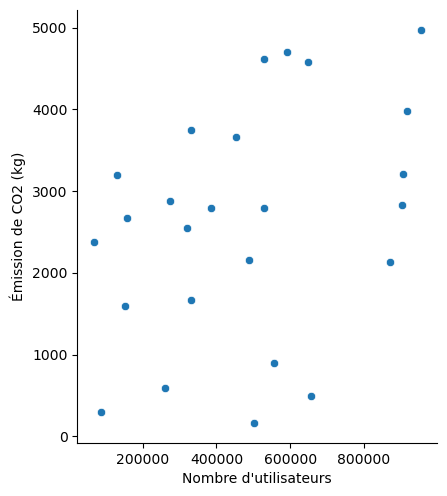

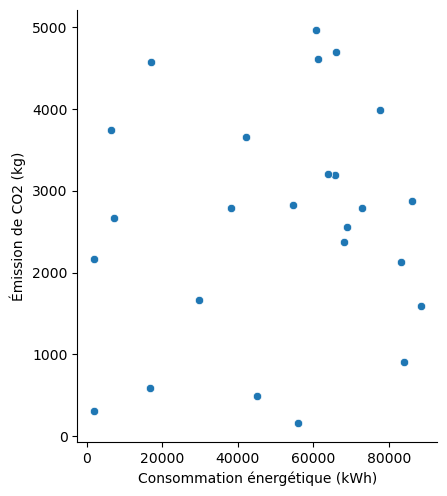

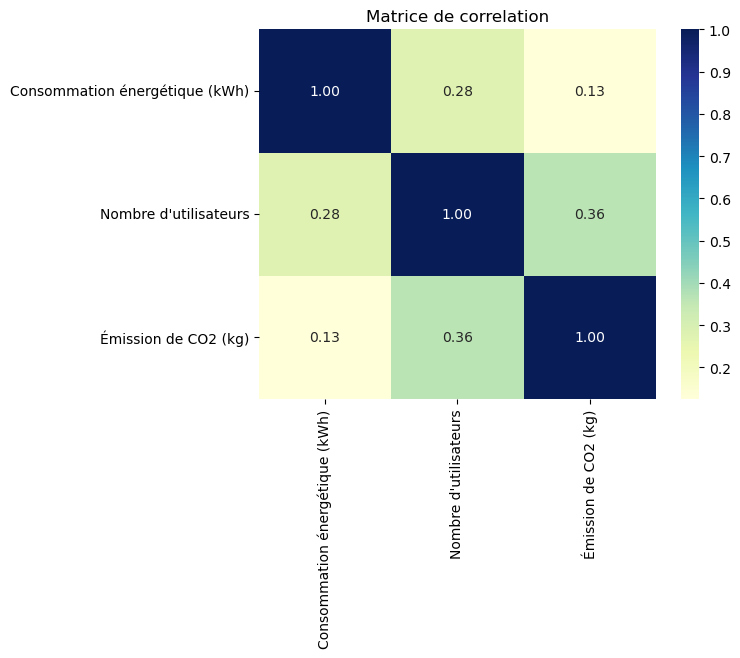

In [508]:
sns.pairplot(data, x_vars=["Nombre d'utilisateurs"], y_vars=['Émission de CO2 (kg)'], height=5, aspect=0.9)
plt.show()

sns.pairplot(data, x_vars=["Consommation énergétique (kWh)"], y_vars=['Émission de CO2 (kg)'], height=5, aspect=0.9)
plt.show()
# Matrice de corrélation

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Matrice de correlation")
plt.show()

De cette matrice il nous ressort que la corrélation entre la variable explicative consommation d'énergie et la variable cible émission de CO2 est très faible. Ce qui nous fait constater que la consommation d'énergie n'a pas un poids significatifs sur l'émission de CO2 donc la relation entre ces données est faible et n'existe presque pas avec le jeu de données dont nous disposons. Cependant la relation entre le nombre d'utilisateurs et l'émission de CO2 est plus forte car ces deux variables sont un peu plus corrélées.

#### Détection des valeurs abérantes 
Ce programme permettra de déterminer les données abérantes si il y en a 

In [514]:
# Calculer les limites avec l'IQR pour chaque variable
Q1 = data.quantile(0.25)  # Premier quartile
Q3 = data.quantile(0.75)  # Troisième quartile
IQR = Q3 - Q1  # Écart interquartile

# Limites pour détecter les valeurs extrêmes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs extrêmes
outliers = ((data < lower_bound) | (data > upper_bound))
print("Valeurs extrêmes détectées :")
print(outliers.sum())

Valeurs extrêmes détectées :
Consommation énergétique (kWh)    0
Nombre d'utilisateurs             0
Émission de CO2 (kg)              0
dtype: int64


Nous pouvons voir selon les résultats qu'il n'y a pas de données abérantes 

## Etape 3 :  Séparation des données

#### Partie 1 : 
Prédiction de la quantité de CO2 émise en fonction de la consommation totale d'énergie en KWh

In [537]:
# Régression linéaire 1 : CO2 en fonction de la consommation énergétique
X1 = data[['Consommation énergétique (kWh)']]
y1 = data['Émission de CO2 (kg)']
# Séparation des données en ensembles d'entraînement et de test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


##### Choix du modèle de régression

Régression linéaire simple avec la méthode des Moindre Carrés Ordinaires

## Etape 4 : Choix du modèle de régression 
### Régression linéaire simple avec la méthode des Moindre Carrés Ordinaires

## Etape 5 :  Entrainement du modèle

In [539]:
# Entraînement du modèle sur l'ensemble d'entraînement 70%
model1 = LinearRegression()
model1.fit(X1_train, y1_train)
# Affichage des coefficients
b0 = model1.intercept_
b1 = model1.coef_[0]
print(f"Équation de la droite de régression : y = {b0:.2f} + {b1:.2f} * x")

Équation de la droite de régression : y = 2846.89 + -0.00 * x


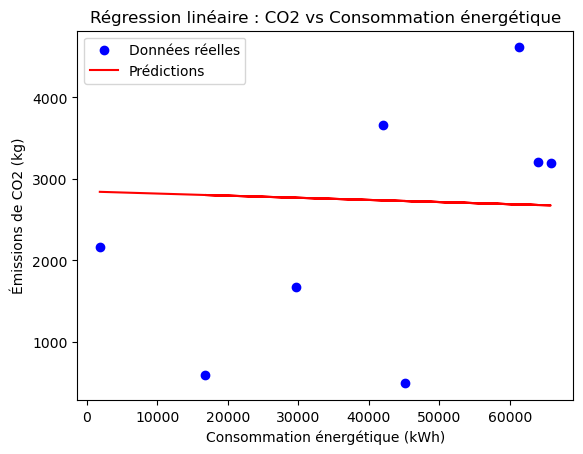

In [541]:
# Prédiction et visualisation de la droite de régression sur l'ensemble de test
y1_pred = model1.predict(X1_test)
# plt.figure(figsize=(10, 7))
plt.scatter(X1_test, y1_test, color='blue', label='Données réelles')
plt.plot(X1_test, y1_pred, color='red', label='Prédictions')
plt.xlabel('Consommation énergétique (kWh)')
plt.ylabel('Émissions de CO2 (kg)')
plt.title('Régression linéaire : CO2 vs Consommation énergétique')
plt.legend()
plt.show()

Nous pouvons observer que la droite ne passe pas par les points de notre nuage de points qui représentent l'ensemble de test. On peut déjà s'appuyer sur ce graphique pour dire que cette droite fourni par le modèle ne permet pas de prédire l'émission de CO2 en fonction de la consommation énergétique 

## Etape 6 : Evaluation du modèle

In [543]:
# Calcul du coefficient de corrélation avec l'ensemble de test
# Données
# Calcul du coefficient de corrélation
correlation = np.corrcoef(data["Consommation énergétique (kWh)"], data['Émission de CO2 (kg)'])[0, 1]
print(f"Coefficient de corrélation linéaire (r) : {correlation:.4f}")

# Calcul du coefficient de détermination (R2) avec l'ensemble de test
#r2_1 = r2_score(y1_test, y1_pred)
#print(f"Coefficient de détermination (R^2) : {r2_1:.4f}")
r2_1 = correlation**2
print(f"Coefficient de détermination (R^2) : {r2_1:.4f}")
# Calcul de l'erreur quadratique moyenne (MSE)
mse1 = mean_squared_error(y1_test, y1_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse1:.4f}")

Coefficient de corrélation linéaire (r) : 0.1251
Coefficient de détermination (R^2) : 0.0157
Erreur quadratique moyenne (MSE) : 2085554.5288


Ici en utilisant la méthode model.score(r2_score) qui calcule notre coefficient de détermination nous obtenons une valeur négative pour les données de test parce que notre jeu de test est trop petit donc avec cette méthode donc on a préférer utiliser la corrélation au carré comme aborder dans le cours. Ainsi on déduit que
la variable consommation d'énergie explique seulement 1% de la variance de l'émission de CO2.Donc on déduit que 
la variable consommation totale énergétique n'explique pas la quantité de CO2 émise, ces variables ne sont pas du tout corrélés 

##### Choix des meilleurs ( 𝜽 0 , 𝜽 1 ) avec la validation croisée

In [707]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np
# Configuration de la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Données (X1 : Consommation énergétique, y1 : Émission de CO2)
X1 = data[['Consommation énergétique (kWh)']].values  # Variable explicative
y1 = data['Émission de CO2 (kg)'].values  # Variable cible

# Liste pour stocker les résultats
results = []

# Validation croisée
for train_index, test_index in kf.split(X1):
    X1_train, X1_test = X1[train_index], X1[test_index]
    y1_train, y1_test = y1[train_index], y1[test_index]
    
    # Régression linéaire
    model1 = LinearRegression()
    model1.fit(X1_train, y1_train)
    
    # Extraire les coefficients
    b0 = model1.intercept_
    b1 = model1.coef_[0]
    
    # Prédictions sur l'ensemble de test
    y1_pred = model1.predict(X1_test)
    
    # Calcul des scores
    mse = mean_squared_error(y1_test, y1_pred)
    mae = mean_absolute_error(y1_test, y1_pred)
    r2 = r2_score(y1_test, y1_pred)
    
    # Ajouter les résultats à la liste
    results.append({'b0': b0, 'b1': b1, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Convertir les résultats en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(results)

# Identifier les meilleurs coefficients
best_mse_row = results_df.loc[results_df['MSE'].idxmin()]  # Meilleur MSE
best_r2_row = results_df.loc[results_df['R2'].idxmax()]    # Meilleur R²

print("Résultats de la validation croisée :")
print(results_df)

# Meilleurs coefficients basés sur MSE
print("\nMeilleurs coefficients basés sur le MSE (Erreur Quadratique Moyenne Minimale) :")
print(f"b0 = {best_mse_row['b0']:.2f}, b1 = {best_mse_row['b1']:.2f}")
print(f"MSE = {best_mse_row['MSE']:.2f}, MAE = {best_mse_row['MAE']:.2f}, R² = {best_mse_row['R2']:.2f}")

# Meilleurs coefficients basés sur R²
print("\nMeilleurs coefficients basés sur le R² (Coefficient de Détermination Maximale) :")
print(f"b0 = {best_r2_row['b0']:.2f}, b1 = {best_r2_row['b1']:.2f}")
print(f"MSE = {best_r2_row['MSE']:.2f}, MAE = {best_r2_row['MAE']:.2f}, R² = {best_r2_row['R2']:.2f}")


Résultats de la validation croisée :
            b0        b1           MSE          MAE        R2
0  2759.796164  0.000688  2.438487e+06  1372.374254 -0.426383
1  2284.856929  0.005047  9.588865e+05   693.072971 -0.162294
2  2329.249605  0.004819  2.654469e+06  1330.221326 -0.000119
3  2202.239701  0.008416  1.574567e+06   874.015210 -0.086080
4  1851.093875  0.013943  2.862352e+06  1553.725319 -0.239571

Meilleurs coefficients basés sur le MSE (Erreur Quadratique Moyenne Minimale) :
b0 = 2284.86, b1 = 0.01
MSE = 958886.47, MAE = 693.07, R² = -0.16

Meilleurs coefficients basés sur le R² (Coefficient de Détermination Maximale) :
b0 = 2329.25, b1 = 0.00
MSE = 2654469.40, MAE = 1330.22, R² = -0.00


Ici nous avons essayer de determiner les meilleurs coefficients teta0 et teta1 qui sont aussi b0 et b1 . Nous constatons que les meilleurs coefficients basés sur le R² (Coefficient de Détermination ) sont b0 = 2329.25, b1 = 0.00. Cependant cela ne permet pas de trouver une valeur de R² significatives pour notre jeu de données).

Tracer de la droite de régression à partir du meilleur choix possible des valeurs de 𝜽 0 et 𝜽 1 pour notre jeu de données

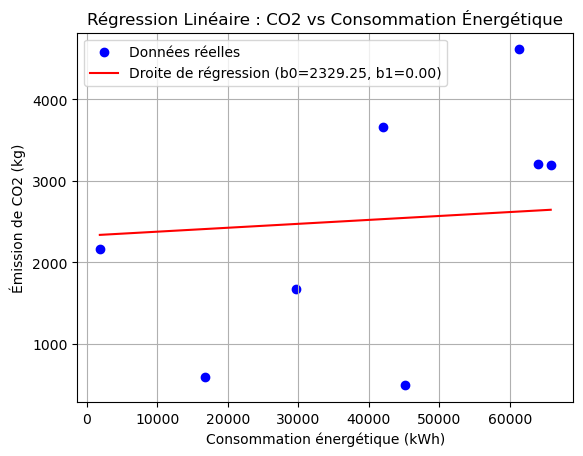

In [711]:
X1 = data[['Consommation énergétique (kWh)']]
y1 = data['Émission de CO2 (kg)']
# Séparation des données en ensembles d'entraînement et de test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Meilleurs coefficients basés sur le MSE
best_b0 = best_r2_row['b0']
best_b1 = best_r2_row['b1']

# Générer les prédictions basées sur les meilleurs coefficients
x_range = np.linspace(X1_test.min(), X1_test.max(), 100).reshape(-1, 1)  # Générer des points sur la plage des X
y_pred = best_b0 + best_b1 * x_range  # Calculer y = b0 + b1 * x

# Tracer les points de données réels
plt.scatter(X1_test, y1_test, color='blue', label='Données réelles')

# Tracer la droite de régression
plt.plot(x_range, y_pred, color='red', label=f'Droite de régression (b0={best_b0:.2f}, b1={best_b1:.2f})')

# Ajouter des étiquettes et un titre
plt.title("Régression Linéaire : CO2 vs Consommation Énergétique")
plt.xlabel("Consommation énergétique (kWh)")
plt.ylabel("Émission de CO2 (kg)")
plt.legend()

# Afficher le graphique
plt.grid()
plt.show()

### Partie 2 : 
Prédiction de la quantité de CO2 émise en fonction du nombre d'utilisateurs

In [550]:
# Régression linéaire 2 : CO2 en fonction du nombre d'utilisateurs
X2 = data[["Nombre d'utilisateurs"]]
y2 = data['Émission de CO2 (kg)']
#X2 = data['Nombre d\'utilisateurs'].values.reshape(-1,1)
#X = X.values.reshape((X.shape[0], 1))
#y2 = data['Émissions de CO2 (kg)'].values
# Séparation des données en ensembles d'entraînement et de test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(17, 1)
(17,)
(8, 1)
(8,)


In [552]:
# Entraînement du modèle sur l'ensemble d'entraînement 70%
model2 = LinearRegression()
model2.fit(X2_train, y2_train)
# Affichage des coefficients
b0 = model2.intercept_
b1 = model2.coef_[0]
print(f"Équation de la droite de régression : y = {b0:.2f} + {b1:.2f} * x")

Équation de la droite de régression : y = 1655.97 + 0.00 * x


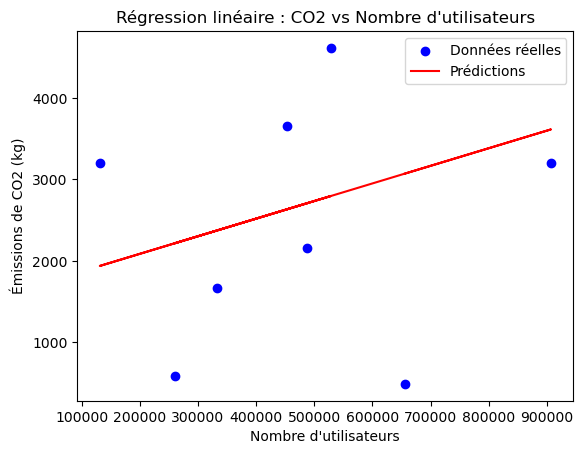

In [554]:
# Prédiction et visualisation de la droite de régression sur l'ensemble de test
y2_pred = model2.predict(X2_test)
# plt.figure(figsize=(10, 7))
plt.scatter(X2_test, y2_test, color='blue', label='Données réelles')
plt.plot(X2_test, y2_pred, color='red', label='Prédictions')
plt.xlabel("Nombre d'utilisateurs")
plt.ylabel('Émissions de CO2 (kg)')
plt.title('Régression linéaire : CO2 vs Nombre d\'utilisateurs')
plt.legend()
plt.show()

Ici on a une droite un peu plus linéaire cependant elle ne passe toujours pas par les points de notre nuage de données 

In [557]:
# Calcul du coefficient de corrélation avec l'ensemble de test
# Données
# Calcul du coefficient de corrélation
correlation = np.corrcoef(data["Nombre d'utilisateurs"], data['Émission de CO2 (kg)'])[0, 1]
print(f"Coefficient de corrélation linéaire (r) : {correlation:.4f}")
# Calcul du coefficient de détermination (R2) avec l'ensemble de test
#r2_2 = r2_score(y2_test, y2_pred)
#print(f"Coefficient de détermination (R^2) : {r2_2:.4f}")
r2_2 = correlation**2
print(f"Coefficient de détermination (R^2) : {r2_2:.4f}")
# Calcul de l'erreur quadratique moyenne (MSE)
mse2 = mean_squared_error(y2_test, y2_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse2:.4f}")

Coefficient de corrélation linéaire (r) : 0.3642
Coefficient de détermination (R^2) : 0.1326
Erreur quadratique moyenne (MSE) : 2025854.1709


La variable nombre d'utilisateurs explique seulement 13% de la variance de l'émission de CO2. Ce qui signifie que le modèle de régression linéaire simple ne permet pas de faire de bonnes prédictions sur le jeu de données que nous utilisons. Ce qui est normal car nos données ne sont que peu corrélés  

##### Choix des meilleurs ( 𝜽 0 , 𝜽 1 ) grâce à la validation croisée 

In [714]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
import numpy as np
# Configuration de la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Données (X1 : Consommation énergétique, y1 : Émission de CO2)
X2 = data[['Nombre d\'utilisateurs']].values  # Variable explicative
y2 = data['Émission de CO2 (kg)'].values  # Variable cible

# Liste pour stocker les résultats
results = []

# Validation croisée
for train_index, test_index in kf.split(X2):
    X2_train, X2_test = X2[train_index], X2[test_index]
    y2_train, y2_test = y2[train_index], y2[test_index]
    
    # Régression linéaire
    model2 = LinearRegression()
    model2.fit(X2_train, y2_train)
    
    # Extraire les coefficients
    b0 = model2.intercept_
    b1 = model2.coef_[0]
    
    # Prédictions sur l'ensemble de test
    y2_pred = model2.predict(X2_test)
    
    # Calcul des scores
    mse = mean_squared_error(y2_test, y2_pred)
    mae = mean_absolute_error(y2_test, y2_pred)
    r2 = r2_score(y2_test, y2_pred)
    
    # Ajouter les résultats à la liste
    results.append({'b0': b0, 'b1': b1, 'MSE': mse, 'MAE': mae, 'R2': r2})

# Convertir les résultats en DataFrame pour une meilleure visualisation
results_df = pd.DataFrame(results)

# Identifier les meilleurs coefficients
best_mse_row = results_df.loc[results_df['MSE'].idxmin()]  # Meilleur MSE
best_r2_row = results_df.loc[results_df['R2'].idxmax()]    # Meilleur R²

print("Résultats de la validation croisée :")
print(results_df)

# Meilleurs coefficients basés sur MSE
print("\nMeilleurs coefficients basés sur le MSE (Erreur Quadratique Moyenne Minimale) :")
print(f"b0 = {best_mse_row['b0']:.2f}, b1 = {best_mse_row['b1']:.2f}")
print(f"MSE = {best_mse_row['MSE']:.2f}, MAE = {best_mse_row['MAE']:.2f}, R² = {best_mse_row['R2']:.2f}")

# Meilleurs coefficients basés sur R²
print("\nMeilleurs coefficients basés sur le R² (Coefficient de Détermination Maximale) :")
print(f"b0 = {best_r2_row['b0']:.2f}, b1 = {best_r2_row['b1']:.2f}")
print(f"MSE = {best_r2_row['MSE']:.2f}, MAE = {best_r2_row['MAE']:.2f}, R² = {best_r2_row['R2']:.2f}")


Résultats de la validation croisée :
            b0        b1           MSE          MAE        R2
0  1882.085579  0.001947  2.416003e+06  1332.453388 -0.413231
1  1319.584153  0.002491  1.816993e+06  1227.471447 -1.202429
2  1884.319417  0.001456  1.988654e+06  1172.961935  0.250739
3  1680.512125  0.001996  1.482772e+06   932.704323 -0.022764
4  1917.932228  0.001363  1.688981e+06  1152.472791  0.268569

Meilleurs coefficients basés sur le MSE (Erreur Quadratique Moyenne Minimale) :
b0 = 1680.51, b1 = 0.00
MSE = 1482772.50, MAE = 932.70, R² = -0.02

Meilleurs coefficients basés sur le R² (Coefficient de Détermination Maximale) :
b0 = 1917.93, b1 = 0.00
MSE = 1688980.80, MAE = 1152.47, R² = 0.27


Ici nous avons essayer de determiner les meilleurs coefficients teta0 et teta1 qui sont aussi b0 et b1 . Nous constatons que les meilleurs coefficients basés sur le R² (Coefficient de Détermination ) sont b0 = 1917.93, b1 = 0.00. Et on trouve une meilleure valeur du R² spitulant que la variable cible est expliqué à un taux de 27% par la variable expliacative

Tracer de la droite de régression à partir du meilleur choix possible des valeurs de  𝜽 0 et 𝜽 1 pour notre jeu de données

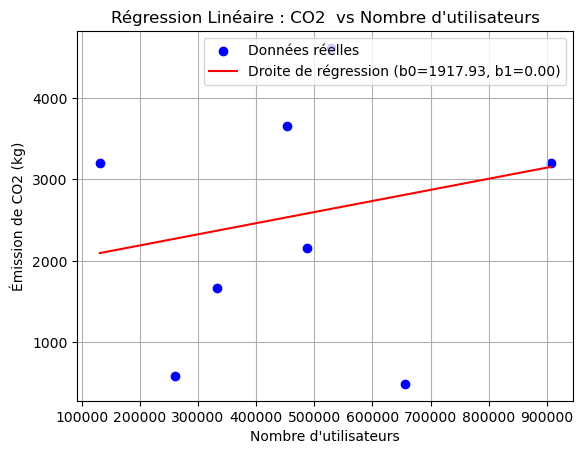

In [718]:
X2 = data[['Nombre d\'utilisateurs']]  # Variable explicative
y2 = data['Émission de CO2 (kg)']  # Variable cible
# Séparation des données en ensembles d'entraînement et de test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Meilleurs coefficients basés sur le MSE
best_b0 = best_r2_row['b0']
best_b1 = best_r2_row['b1']

# Générer les prédictions basées sur les meilleurs coefficients
x_range = np.linspace(X2_test.min(), X2_test.max(), 100).reshape(-1, 1)  # Générer des points sur la plage des X
y_pred = best_b0 + best_b1 * x_range  # Calculer y = b0 + b1 * x

# Tracer les points de données réels
plt.scatter(X2_test, y2_test, color='blue', label='Données réelles')

# Tracer la droite de régression
plt.plot(x_range, y_pred, color='red', label=f'Droite de régression (b0={best_b0:.2f}, b1={best_b1:.2f})')

# Ajouter des étiquettes et un titre
plt.title("Régression Linéaire : CO2  vs Nombre d'utilisateurs")
plt.xlabel("Nombre d'utilisateurs")
plt.ylabel("Émission de CO2 (kg)")
plt.legend()

# Afficher le graphique
plt.grid()
plt.show()

Donc à la fin on obtient une meilleure droite de régression

## VALIDATION DU MODELE

In [722]:
from sklearn.model_selection import cross_val_score, KFold

# Variable explicative ( X1) et variable à expliquer y1
X1 = data[['Consommation énergétique (kWh)']].values  # Variable explicative
y1 = data['Émission de CO2 (kg)'].values  # Variable cible


# Créer le modèle de régression linéaire
model1 = LinearRegression()

# Entraîner le modèle sur l'ensemble des données
model1.fit(X1, y1)

# Afficher les coefficients estimés
print(f"Estimation des paramètres : Intercept (β0) = {model1.intercept_}, Coefficients (β1) = {model1.coef_}")

# Calculer le coefficient de détermination R2
r2_score = model1.score(X1, y1)
print(f"Coefficient de détermination R² (sur l'ensemble des données) : {r2_score}")

# Appliquer la validation croisée (k-fold = 5 ici)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Appliquer la validation croisée pour calculer R2
cross_val_r2 = cross_val_score(model1, X1, y1, cv=kf, scoring='r2')

# Afficher les résultats
print("Scores R² sur les folds de validation croisée :", cross_val_r2)
print("Moyenne des scores R² :", cross_val_r2.mean())
print("Écart-type des scores R² :", cross_val_r2.std())


# Variable explicative ( X1) et variable à expliquer y1
X2 = data[['Nombre d\'utilisateurs']].values  # Variable explicative
y2 = data['Émission de CO2 (kg)'].values  # Variable cible


# Créer le modèle de régression linéaire
model2 = LinearRegression()

# Entraîner le modèle sur l'ensemble des données
model2.fit(X2, y2)

# Afficher les coefficients estimés
print('\n \n')
print(f"Estimation des paramètres : Intercept (β0) = {model2.intercept_}, Coefficients (β1) = {model2.coef_}")

# Calculer le coefficient de détermination R2
r2_score2 = model2.score(X2, y2)
print(f"Coefficient de détermination R² (sur l'ensemble des données) : {r2_score2}")

# Appliquer la validation croisée (k-fold = 5 ici)
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Appliquer la validation croisée pour calculer R2
cross_val_r2_2 = cross_val_score(model2, X2, y2, cv=kf, scoring='r2')

# Afficher les résultats

print("Scores R² sur les folds de validation croisée :", cross_val_r2_2)
print("Moyenne des scores R² :", cross_val_r2_2.mean())
print("Écart-type des scores R² :", cross_val_r2_2.std())



Estimation des paramètres : Intercept (β0) = 2305.305339791924, Coefficients (β1) = [0.0062589]
Coefficient de détermination R² (sur l'ensemble des données) : 0.015661469868615496
Scores R² sur les folds de validation croisée : [-4.26383388e-01 -1.62293955e-01 -1.18620777e-04 -8.60801418e-02
 -2.39571101e-01]
Moyenne des scores R² : -0.18288944121722986
Écart-type des scores R² : 0.14539841812173607

 

Estimation des paramètres : Intercept (β0) = 1728.745129648395, Coefficients (β1) = [0.00186047]
Coefficient de détermination R² (sur l'ensemble des données) : 0.1326120613125913
Scores R² sur les folds de validation croisée : [-0.41323134 -1.2024293   0.25073914 -0.02276378  0.26856938]
Moyenne des scores R² : -0.22382317936677767
Écart-type des scores R² : 0.5480200901187118


Nous pouvons dire globalement que pour notre jeu de donnée, des deux variables explicatives qui sont la consommation d'énergie et le nombre d'utilisateurs c'est le nombre d'utilisateurs qui arrive à expliquer le mieux la variable cible qui est l'émission de CO2. Cependant du fait que nos variables explicatives ne soit pas assez corrélés à la variable cible, le modèle de regression linéaire devient inapproprié pour ce jeu de donnée. Ce qui donne une faible valeur pour le coefficient de détermination et beaucoup d'erreur de prédiction

# CONCLUSION

La faible performance du modèle peut être attribuée à plusieurs facteurs interdépendants. D'une part, les variables explicatives sélectionnées présentent une relation limitée avec la variable cible, ce qui réduit leur capacité à expliquer les variations observées. D'autre part, l'utilisation de la régression linéaire comme approche peut s'avérer inadéquate pour capturer des relations potentiellement plus complexes entre les données. Enfin, la qualité des données constitue un autre défi, avec la présence de bruit, de valeurs aberrantes, ou encore d'un volume insuffisant d'observations, limitant ainsi la robustesse et la fiabilité des résultats obtenus. Ces éléments soulignent la nécessité d'améliorer la sélection des variables, d'explorer des modèles plus adaptés, et de renforcer la qualité des données utilisées.

# Algo 2 : KNN (Classification de l'efficacité énergétique)


## INTRODUCTION

L'impact environnemental des services numériques constitue une préoccupation majeure à l'ère de la transition écologique. Dans ce contexte, ce projet vise à classifier l'efficacité énergétique de ces services en évaluant leur empreinte carbone. En utilisant l'algorithme K-Nearest Neighbors (KNN), l'objectif est de regrouper les services en trois catégories distinctes : faible, moyenne et élevée, sur la base de leurs émissions de CO₂. 
À travers une méthodologie rigoureuse incluant la préparation des données, l'entraînement du modèle et l'évaluation de ses performances, ce projet contribue à une meilleure compréhension et gestion de la durabilité numérique.

## Etape 1 : Préparation des données 

In [364]:
# Nous allons d'abord diviser la variable "Émission de CO2 (kg)" en catégories : "faible", "moyenne", "élevée". 
#Nous utiliserons les quantiles pour définir ces catégories.

import pandas as pd
import numpy as np

df = pd.read_csv("services_numeriques.csv")

bins = [0, df['Émission de CO2 (kg)'].quantile(0.33), df['Émission de CO2 (kg)'].quantile(0.67), df['Émission de CO2 (kg)'].max()]
labels = ['faible', 'moyenne', 'élevée']
df['Catégorie d\'empreinte carbone'] = pd.cut(df['Émission de CO2 (kg)'], bins=bins, labels=labels)

df

,Unnamed: 0,Service numérique,Consommation énergétique (kWh),Nombre d'utilisateurs,Type d'Energie utilisée,Pays,Émission de CO2 (kg),Catégorie d'empreinte carbone
0,1,Streaming vidÃ©o,16795,259795,Renouvelable,France,592,faible
1,2,Recherche sur internet,1860,487232,Renouvelable,UK,2162,moyenne
2,3,RÃ©seaux sociaux,77820,918040,Renouvelable,Allemagne,3984,élevée
3,4,E-commerce,55886,501186,Renouvelable,UK,164,faible
4,5,Jeux en ligne,7265,157730,Non-renouvelable,Allemagne,2668,moyenne
5,6,Cloud computing,83386,871910,Non-renouvelable,Allemagne,2127,faible
6,7,Email,38194,385681,Renouvelable,UK,2795,moyenne
7,8,Stockage de fichiers,88498,150503,Non-renouvelable,Canada,1595,faible
8,9,Applications de messagerie,45131,655811,Non-renouvelable,Allemagne,491,faible
9,10,Streaming audio,61263,528035,Non-renouvelable,Allemagne,4614,élevée


## Visualisation de la répartition des catégories 

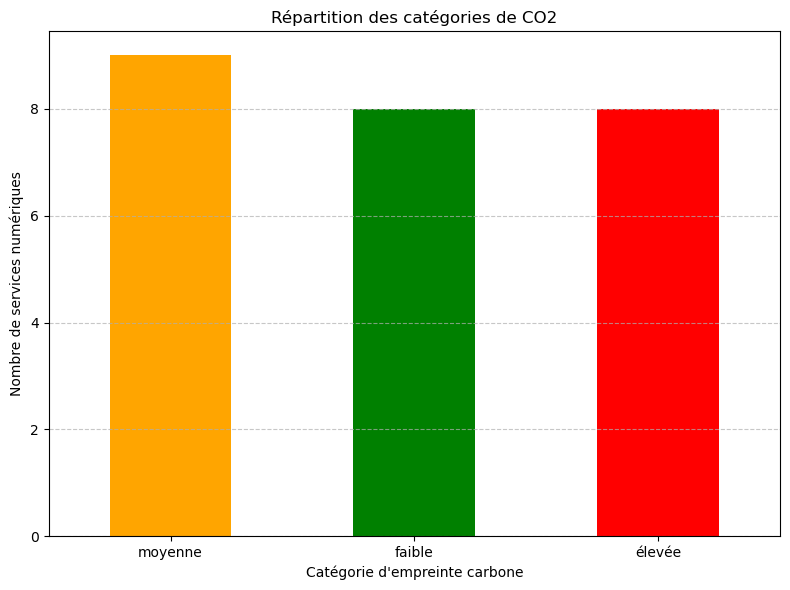

In [292]:
import matplotlib.pyplot as plt

# Visualiser la répartition des catégories
category_distribution = df["Catégorie d\'empreinte carbone"].value_counts()

plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar', color=['orange', 'green', 'red'])
plt.title("Répartition des catégories de CO2")
plt.xlabel("Catégorie d\'empreinte carbone")
plt.ylabel("Nombre de services numériques")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Etape 2: Séparation des données 

In [294]:
from sklearn.model_selection import train_test_split

# Variables explicatives et cible
X = df[['Consommation énergétique (kWh)', 'Nombre d\'utilisateurs']]
y = df['Catégorie d\'empreinte carbone']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} exemples")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} exemples")


Taille de l'ensemble d'entraînement : 17 exemples
Taille de l'ensemble de test : 8 exemples


## Étape 3 : Choix du modèle KNN

In [298]:
#Nous allons utiliser l'algorithme KNN et essayer plusieurs valeurs de K pour trouver la meilleure.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

# Essayer plusieurs valeurs de K
k_values = range(1,18) #on fais varier k entre 1 et 18 parceque selon les principes de KNN, le k doit etre au plus égal au nombre de données du jeu 
                        #d'entrainement ( ce qui est 18 dans notre cas ici. la fonction range prenant les valeurs de 1 à n-1 donc il s'arrete à 18 

best_k = 1
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Meilleur K: {best_k} avec une précision de {best_accuracy:.2f}")



Meilleur K: 7 avec une précision de 0.50


Nous constatons que le meilleur k est k=7, ce qui n'est pas loin de la racine carrée (5) exacte du jeu de données total(25). Or d'après le cours: En pratique, la valeur optimale de k conseillée est la racine carrée de N, où N est le nombre total d'échantillons.Nous estimons donc que notre modèle a pu déterminer de façon approximative le K idéal quand bien même que la précision est de 50% (ce qui est normal vu la plage de valeurs k que nous avons proposé).

## Etape 4: Entrainement du modèle

In [302]:
#Entraînons le modèle KNN sur les variables explicatives : Consommation énergétique (kWh) et Nombre d'utilisateurs. La variable cible sera la 
#catégorie d’empreinte carbone (faible, moyenne, élevée)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Nous créons d'abord le modèle KNN avec la meilleure valeur optimale de K trouvée précédemment.
model = KNeighborsClassifier(n_neighbors=best_k)  

# Et on finit par entrainer le modèle sur les données d'entraînement
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

## Prédiction sur les données de test



In [304]:
#Après entrainement, nous allons prédire les labels sur l'ensemble de test.

y_pred = model.predict(X_test)

# Création du DataFrame pour afficher les résultats de manière organisée
results_df = pd.DataFrame({
    'Labels réels': y_test,
    'Labels prédits': y_pred
})
print(results_df)

# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

# Affichage de la précision
print(f"Précision du modèle avec K={best_k}: {accuracy:.2f}")


   Labels réels Labels prédits
8        faible         faible
16       élevée         élevée
0        faible        moyenne
23       faible        moyenne
11       élevée        moyenne
9        élevée         élevée
13      moyenne        moyenne
1       moyenne         élevée
Précision du modèle avec K=7: 0.50


## Etape 5: Évaluation du modèle


In [308]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

# Afficher le rapport de classification (précision, rappel, f1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

#  affichage de la précision (accuracy) 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision (Accuracy) du modèle : {accuracy:.2f}")


Matrice de confusion :
[[1 2 0]
 [0 1 1]
 [0 1 2]]

Rapport de classification :
              precision    recall  f1-score   support

      faible       1.00      0.33      0.50         3
     moyenne       0.25      0.50      0.33         2
      élevée       0.67      0.67      0.67         3

    accuracy                           0.50         8
   macro avg       0.64      0.50      0.50         8
weighted avg       0.69      0.50      0.52         8


Précision (Accuracy) du modèle : 0.50


# VALIDATION DU MODELE

## VISUALISATION DE LA HEATMAP DE LA MATRICE DE CONFUSION

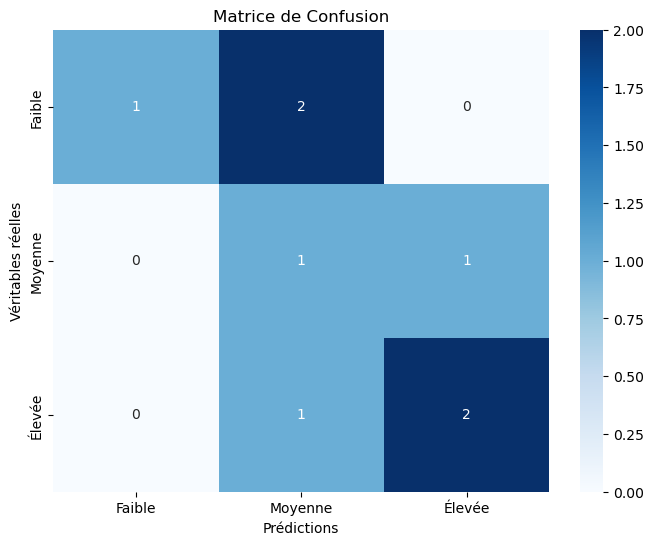

In [310]:
#Pour ajouter une heatmap de la matrice de confusion, nous utiliserons la bibliothèque Seaborn pour une visualisation plus claire des performances du modèle

import seaborn as sns
import matplotlib.pyplot as plt

# Création de la heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Faible', 'Moyenne', 'Élevée'], 
            yticklabels=['Faible', 'Moyenne', 'Élevée'])

# Ajout des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables réelles')

# Afficher la heatmap
plt.show()


Analyse de la Heatmap

- Observations générales :
  - La heatmap montre que les prédictions correctes (cases diagonales) sont limitées, et les erreurs (cases hors diagonale) restent fréquentes. Cela reflète la difficulté du modèle à bien distinguer les trois catégories d'empreinte carbone ("faible," "moyenne," "élevée").
  - La confusion entre les classes peut être due au manque d’exemples représentatifs dans un dataset aussi réduit (25 services).
  

- Répartition des erreurs :
  - Certaines classes peuvent dominer les prédictions en raison de leur sur-représentation relative, ou inversement, les classes minoritaires peuvent être systématiquement mal classifiées.
 

    Faibles performances générales :

Si les valeurs hors de la diagonale sont élevées, cela signifie que le modèle a souvent confondu les catégories. Par exemple :
"Faible" a souvent été classé comme "Moyenne".
"Élevée" a été classé incorrectement comme "Moyenne", indiquant une tendance du modèle à privilégier certaines classes (moyenne) dans notre cas.

    Sources possibles d'erreur :

Les seuils pour diviser les émissions de CO₂ en catégories ("faible", "moyenne", "élevée") pourraient être mal adaptés et ne pas refléter une séparation nette dans les données.
Les classes pourraient être déséquilibrées (par exemple, davantage de services dans une catégorie spécifique), influençant le modèle à privilégier les catégories majoritaires.


#  Cross-validation : 

Nous effectuons une validation croisée pour s’assurer de la 
robustesse du modèle KNN

In [314]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import  StratifiedKFold

cv = StratifiedKFold(5)
                        #On utilise StratifiedKFold au lieu de KFold ou de ShuffleSplit pour s'assurer que la répartition des classes dans 
                        #chaque sous-échantillon reflète celle du jeu de données d'origine, ce qui est crucial pour les ensembles déséquilibrés. 
                        #Cela garantit une meilleure évaluation des performances du modèle.


scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Résultats
print(f"Scores par pli : {scores}")
print(f"Précision moyenne : {scores.mean():.2f}")
print(f"Écart-type des scores : {scores.std():.2f}")


Scores par pli : [0.4 0.4 0.4 0.4 0.2]
Précision moyenne : 0.36
Écart-type des scores : 0.08


## Interprétation des résultats



    Précision globale (36%) :
    
Le modèle est légèrement meilleur qu’un modèle aléatoire (qui aurait une précision attendue de ~33% pour trois classes), mais il reste très loin de l’objectif idéal (souvent fixé à 85% ou plus dans ce type de projet).
Cela indique que le KNN capte très peu de patterns significatifs dans les données et que ses prédictions manquent de fiabilité.
Dans sa configuration actuelle, le modèle ne parvient pas à séparer correctement les classes d’empreinte carbone.
De plus, avec un petit dataset, le modèle manque probablement de suffisamment de voisins pertinents pour établir des relations solides entre les variables explicatives et la variable cible.
    
    - Impact du petit dataset :
    
Le modèle est fortement limité par la taille des données : 25 services ne permettent pas de capturer la diversité et les nuances des catégories d’empreinte carbone.  Les trois classes d’empreinte carbone sont probablement sous-échantillonnées, augmentant les erreurs de classification.
Les valeurs proches dans l'espace des variables explicatives peuvent entraîner des prédictions erronées, car elles n'appartiennent pas forcément à la même classe cible.


    -Corrélation entre variables :
    
Les deux variables utilisées (consommation énergétique et nombre d'utilisateurs) pourraient ne pas être assez explicatives. Inclure des variables comme le type d'énergie ou des indicateurs géographiques pourrait fournir des insights supplémentaires.


    -Catégorisation des émissions de CO₂ :

La méthode de segmentation en trois catégories (quantiles) ne reflète surement pas correctement les relations entre les variables et les classes.


    Métriques complémentaires :

Le rapport de classification (précision, rappel, F1-score) permet d'approfondir cette analyse :
Une précision globale de 36% peut masquer des disparités entre les classes.
Certaines catégories pourraient avoir une précision ou un rappel élevés, tandis que d'autres sont négligées. Par exemple dans notre cas ci: 
Une faible précision (precision) pour la catégorie "moyenne" indique que les prédictions pour cette catégorie sont souvent incorrectes.
Un faible rappel (recall) de la catégorie "faible" montre que le modèle a du mal à identifier correctement les éléments pertinents dans cette catégorie. 



In [ ]:
#SUGGESTIONS POUR AMELIORATION


1. Augmenter la taille du dataset :
   - Passer de 25 à au moins 100 ou 1000 services numériques en générant des données supplémentaires ou en collectant des données réelles.
   - Cela améliorerait la représentativité des classes et la performance du modèle.
   - Un dataset élargi permettrait de fournir davantage d’exemples pour que le modèle identifie des patterns plus clairs.
  

2. Améliorer l'équilibre entre classes : Utiliser des techniques de résampling (oversampling, SMOTE) pour équilibrer les catégories sous-représentées.

3. Explorer d'autres modèles :
   - Le KNN est sensible à la taille du dataset. Tester d'autres valeurs de K avec "validation croisée" pourrait limiter l'impact du dataset réduit     et ainsi améliorer la performance.     -Optimiser le modèle, en explorant des algorithmes alternatifs ou des techniques de prétraitement avancées.
   - Des algorithmes plus robustes (comme les arbres de décision ou les forêts aléatoires) pourraient mieux gérer les petits datasets.

4. Analyser les variables :
   - Vérifier si les variables explicatives (consommation énergétique, nombre d'utilisateurs) suffisent pour bien discriminer les classes. 
            Ajouter des variables comme le type d'énergie ou le pays pourrait améliorer les prédictions.


## CONCLUSION

Le projet montre que, même avec un dataset limité, un modèle KNN capte très peu de patterns, et la précision de 36% reste insuffisante pour des prédictions fiables. Pour améliorer ces résultats, il est crucial d'élargir le dataset et d'explorer des approches complémentaires. Cette étude souligne l'importance de disposer de données riches et diversifiées pour obtenir des analyses fiables et exploitables.


## PISTES DE SOLUTION POUR FAIRE EVOLUER LA PERFORMANCE DU MODELE: 
### Elargir le dataset de 25 à 1000 échantillons

Procédons maintenant à l'élargissement du dataset en vue de performer le modèle tel quon l'a suggéré précédemment. Nous verrons à la fin si  l'application de cette proposition a pu faire évoluer le,modèle d'une quelconque façon.  
Etant donné qu'ici nous ne ferons que générer un nouveau dataset de 1000 échantillons et qu'il faudra juste charger ce fichier csv à notre modèle, nous n'allons plus séquencer le code tel qu'il a été fait précédemment mais réunir toute les étapes dans une même section de code. Les commentaires appropriés au nouveau dataset seront toutefois énumérés.

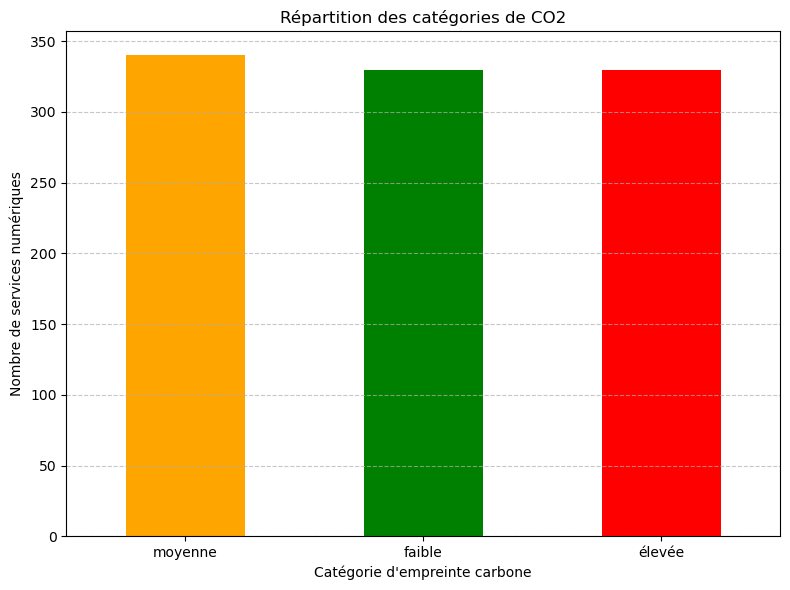



Taille de l'ensemble d'entraînement : 700 exemples
Taille de l'ensemble de test : 300 exemples


Meilleur K: 27 avec une précision de 0.65




    Labels réels Labels prédits
521       faible         faible
737       faible         faible
740       faible         faible
660       faible         élevée
411       faible         faible
..           ...            ...
468       faible         faible
935       faible         faible
428      moyenne         élevée
7        moyenne        moyenne
155       faible         faible

[300 rows x 2 columns]


Précision du modèle avec K=27: 0.65


Matrice de confusion :
[[89  7  7]
 [19 44 46]
 [ 3 24 61]]

Rapport de classification :
              precision    recall  f1-score   support

      faible       0.80      0.86      0.83       103
     moyenne       0.59      0.40      0.48       109
      élevée       0.54      0.69      0.60        88

    accuracy                           0.65       300
   macro avg       0.64      0.65      0.64   

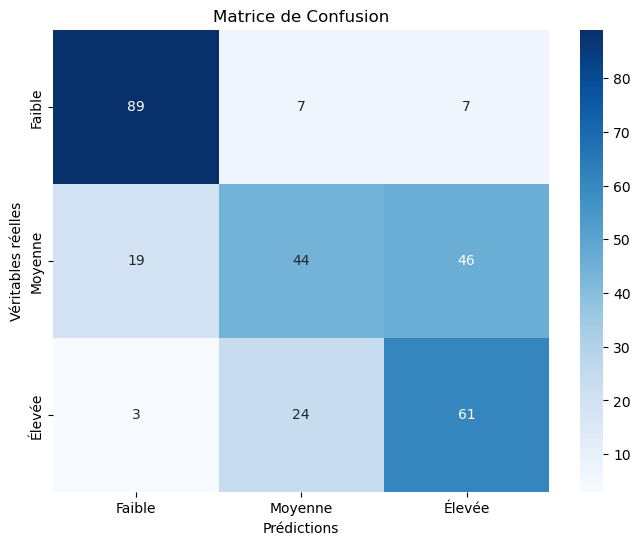



Scores par pli : [0.68  0.635 0.64  0.6   0.65 ]
Précision moyenne : 0.64
Écart-type des scores : 0.03


In [328]:
#Etape1 : Génération de données 
    #Le fichier csv a déjà été généré. Nous avons utiliser le code du début et changer le prompt en demandant un dataset de 1000 échantillons

import pandas as pd
import numpy as np

df = pd.read_csv("services_numeriques___1000.csv")

bins = [0, df['Émission de CO2 (kg)'].quantile(0.33), df['Émission de CO2 (kg)'].quantile(0.67), df['Émission de CO2 (kg)'].max()]
labels = ['faible', 'moyenne', 'élevée']
df['Catégorie d\'empreinte carbone'] = pd.cut(df['Émission de CO2 (kg)'], bins=bins, labels=labels)

df.head() # étant avec 1000 échantillons nous optons d'afficher juste les 5 premiers échantillons

print("\n")


#Sous-étape 1  : # Visualiser la répartition des catégories

import matplotlib.pyplot as plt

category_distribution = df["Catégorie d\'empreinte carbone"].value_counts()
plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar', color=['orange', 'green', 'red'])
plt.title("Répartition des catégories de CO2")
plt.xlabel("Catégorie d\'empreinte carbone")
plt.ylabel("Nombre de services numériques")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("\n")

#Etape 2 : Séparation des données

from sklearn.model_selection import train_test_split

# Variables explicatives et cible
X = df[['Consommation énergétique (kWh)', 'Nombre d\'utilisateurs']]
y = df['Catégorie d\'empreinte carbone']

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Afficher les tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {X_train.shape[0]} exemples")
print(f"Taille de l'ensemble de test : {X_test.shape[0]} exemples")

print("\n")


#Etape 3 : Choix du modèle KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt

# Essayer plusieurs valeurs de K
k_values = range(1,35) #on fais varier k entre 1 et 35 parceque selon les principes de KNN, le k optimal est souvent la racine carée du dataset total. 
                      #la racine carrée étant ici 31 , on estime avoir balayer la plage de k nécessaire
                        
best_k = 1
best_accuracy = 0

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Meilleur K: {best_k} avec une précision de {best_accuracy:.2f}")

print("\n")


#Etape 4 : Entrainement du modèle

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Nous créons d'abord le modèle KNN avec la meilleure valeur optimale de K trouvée précédemment.
model = KNeighborsClassifier(n_neighbors=best_k)  

# Et on finit par entrainer le modèle sur les données d'entraînement
model.fit(X_train, y_train)

print("\n")


#Sous étape 4 : Prédictions des labels 

y_pred = model.predict(X_test)

# Création du DataFrame pour afficher les résultats de manière organisée
results_df = pd.DataFrame({
    'Labels réels': y_test,
    'Labels prédits': y_pred
})
print(results_df)
print("\n")

# Calcul de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)

# Affichage de la précision
print(f"Précision du modèle avec K={best_k}: {accuracy:.2f}")

print("\n")

#Etape 5 : Evaluation du modèle 

from sklearn.metrics import confusion_matrix, classification_report

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion
print("Matrice de confusion :")
print(conf_matrix)

# Afficher le rapport de classification (précision, rappel, f1-score)
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

#  affichage de la précision (accuracy) 
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision (Accuracy) du modèle : {accuracy:.2f}")

print("\n")

                        #VALIDATION DU MODELE

        #VISUALISATION DE LA HEATMAP DE LA MATRICE DE CONFUSION 
#Pour ajouter une heatmap de la matrice de confusion, nous utiliserons la bibliothèque Seaborn pour une visualisation plus claire des performances du modèle

import seaborn as sns
import matplotlib.pyplot as plt

# Création de la heatmap de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Faible', 'Moyenne', 'Élevée'], 
            yticklabels=['Faible', 'Moyenne', 'Élevée'])

# Ajout des labels et un titre
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Véritables réelles')

# Afficher la heatmap
plt.show()




print("\n")

        #CROSS-VALIDATION

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import  StratifiedKFold

cv = StratifiedKFold(5)
                        #On utilise StratifiedKFold au lieu de KFold ou de ShuffleSplit pour s'assurer que la répartition des classes dans 
                        #chaque sous-échantillon reflète celle du jeu de données d'origine, ce qui est crucial pour les ensembles déséquilibrés. 
                        #Cela garantit une meilleure évaluation des performances du modèle.


scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Résultats
print(f"Scores par pli : {scores}")
print(f"Précision moyenne : {scores.mean():.2f}")
print(f"Écart-type des scores : {scores.std():.2f}")




## Analyse de la Heatmap

    -Observations générales :
    
La heatmap montre que les prédictions correctes se trouvent principalement dans les cases diagonales, mais les erreurs (cases hors diagonale) restent significatives, particulièrement pour les classes "moyenne" et "élevée".
Cela reflète les limites du modèle à bien distinguer les trois catégories d’empreinte carbone.

    -Répartition des erreurs :
    
La classe "faible" est correctement prédite dans 89 cas sur 103, montrant une bonne performance avec un recall de 86%. Cependant, quelques erreurs existent, avec 7 cas classés comme "moyenne" et 7 comme "élevée".
La classe "moyenne" est mal prédite, avec seulement 44 prédictions correctes sur 109. La majorité des erreurs viennent des confusions avec la classe "élevée" (46 cas). Cela explique un recall de 40%, ce qui est insuffisant.
La classe "élevée" a un recall de 69%, montrant une performance moyenne. Cependant, 24 cas sont confondus avec "moyenne," suggérant un chevauchement important entre ces deux classes.

    -Faibles performances générales :
    
Les erreurs importantes hors de la diagonale, surtout entre "moyenne" et les deux autres classes, indiquent que le modèle éprouve des difficultés à différencier ces catégories.
Une tendance marquée à privilégier les classes "faible" et "élevée" dans les prédictions est perceptible, tandis que la classe "moyenne" semble souvent négligée.


### INTERPRETATION DES RESULTATS

    -Précision globale (64 %) :

Le modèle montre une nette amélioration par rapport à une précision de 36 % et dépasse largement le niveau d’un modèle aléatoire (précision attendue de ~33 % pour trois classes). Cependant, il reste en deçà de l’objectif idéal de 85 %, ce qui reflète encore des limites dans la capacité du modèle à capturer les patterns des données.
Malgré cette progression, les prédictions ne sont pas encore suffisamment fiables pour une utilisation pratique.


    -Impact de l'élargissement du dataset :

L’augmentation à 1000 données a permis au modèle de mieux généraliser et de trouver des voisins plus pertinents, améliorant ainsi la qualité des prédictions.
Toutefois, des erreurs significatives subsistent, notamment entre les classes, ce qui indique que # la quantité de données seule ne résout pas tous les problèmes liés à la classification.


    -Limites restantes :

Confusion entre classes : Les erreurs hors diagonale (comme entre "moyenne" et "élevée") suggèrent que les variables explicatives ne suffisent toujours pas à bien séparer les classes.
Déficit en informations pertinentes : Les variables utilisées (consommation énergétique et nombre d’utilisateurs) peuvent manquer de pertinence ou de corrélation avec les catégories de CO₂, limitant la capacité prédictive du modèle.


    -Métriques complémentaires :
    
L’analyse des métriques comme le recall et la précision par classe pourrait révéler des disparités :Certaines classes, comme "faible," pourraient être mieux identifiées que "moyenne" ou "élevée". Des ajustements sont nécessaires pour réduire les biais du modèle envers certaines catégories.


# CONCLUSION 

L’élargissement du dataset à 1000 échantillons a permis d’améliorer la précision globale du modèle, passant de 36 % à 64 %(près du double de l'ancienne précision). Cette progression démontre que l'augmentation des données aide le modèle KNN à mieux capturer certains patterns. Toutefois, les performances restent insuffisantes pour une classification fiable, en raison de confusions persistantes entre les classes, particulièrement pour la catégorie "moyenne". Nous concluons donc que **la quantité de données seule ne résout pas tous les problèmes liés à la classification KNN**. 

**Nous estimons quand même avoir réussi à prouver notre hypothèse précédemment énumérée, laquelle était d'augmenter la performance du modèle en élargissant la taille du dataset**.

Pour aller plus loin, il est essentiel d'enrichir les variables explicatives afin de mieux représenter les distinctions entre les classes et de réviser les critères de catégorisation. En complément, l’exploration de modèles plus avancés pourrait permettre d’atteindre des performances conformes aux objectifs initiaux de précision.

## Algo 3 : K-means 

### INTRODUCTION

La segmentation des services numériques est essentielle pour identifier des groupes aux profils similaires et mieux comprendre leur consommation énergétique et leur utilisation. Ce projet vise à regrouper les services numériques en clusters en utilisant les variables de consommation énergétique et du nombre d'utilisateurs. Grâce à l'algorithme K-means, nous déterminerons des groupes homogènes, après avoir normalisé les données et identifié le nombre optimal de clusters à l'aide de la méthode du coude. Cette approche permettra d’obtenir des informations clés sur les caractéristiques partagées par ces services, facilitant ainsi des analyses approfondies et des décisions stratégiques sur leur gestion.

## Étape 1 : Préparation des données

Cette première étape du projet se concentre sur la préparation des données, un préalable indispensable pour l'application de l'algorithme de clustering k-means. Nous travaillerons sur les variables consommation énergétique (kWh) et nombre d’utilisateurs.

Ces deux variables représentent les dimensions principales que nous étudierons pour segmenter les services numériques en groupes homogènes. La consommation énergétique reflète l'impact environnemental de chaque service, tandis que le nombre d’utilisateurs illustre son utilisation réelle. En les combinant, nous cherchons à identifier des relations ou des schémas cachés entre ces deux aspects.

In [402]:
import pandas as pd

data = pd.read_csv('services_numeriques.csv')
data_model_kmeans = data[["Consommation énergétique (kWh)", "Nombre d'utilisateurs"]]
print(data_model_kmeans)

    Consommation énergétique (kWh)  Nombre d'utilisateurs
0                            16795                 259795
1                             1860                 487232
2                            77820                 918040
3                            55886                 501186
4                             7265                 157730
5                            83386                 871910
6                            38194                 385681
7                            88498                 150503
8                            45131                 655811
9                            61263                 528035
10                           17023                 649143
11                           42090                 453366
12                           68221                  66725
13                           65820                 130981
14                            1769                  85654
15                           60735                 954277
16            

## Étape 2 : Normalisation des données

L’étape de normalisation des données est une phase cruciale pour garantir que les variables utilisées dans l’algorithme de clustering **k-means** sont **comparables** en termes d’échelle. Comme les unités et les amplitudes de la consommation énergétique (en kWh) et du nombre d’utilisateurs diffèrent significativement, leur traitement brut pourrait biaiser l’analyse.  

La **normalisation** permet de transformer ces variables pour qu’elles soient exprimées sur une échelle commune, généralement entre 0 et 1. Ce qui empêche une variable d'avoir un impact disproportionné sur les résultats du clustering.

Cette étape prépare donc des données équilibrées et prêtes pour une segmentation efficace.

In [404]:
X_min = data_model_kmeans["Consommation énergétique (kWh)"].min()
X_max = data_model_kmeans["Consommation énergétique (kWh)"].max()

Y_min = data_model_kmeans["Nombre d'utilisateurs"].min()
Y_max = data_model_kmeans["Nombre d'utilisateurs"].max()



norm_data_model_kmeans_X = []
norm_data_model_kmeans_Y = []

for X in data_model_kmeans["Consommation énergétique (kWh)"]:
    X_prime = (X - X_min)/(X_max - X_min)
    norm_data_model_kmeans_X.append(X_prime)
    
for Y in data_model_kmeans["Nombre d'utilisateurs"]:
    Y_prime = (Y - Y_min)/(Y_max - Y_min)
    norm_data_model_kmeans_Y.append(Y_prime)

norm_data_model_kmeans = pd.DataFrame({"Consommation énergétique (kWh)": norm_data_model_kmeans_X, "Nombre d'utilisateurs": norm_data_model_kmeans_Y})
print("Données  normalisées : \n", norm_data_model_kmeans)

Données  normalisées : 
     Consommation énergétique (kWh)  Nombre d'utilisateurs
0                         0.173252               0.217531
1                         0.001049               0.473783
2                         0.876881               0.959172
3                         0.623978               0.489505
4                         0.063370               0.102535
5                         0.941058               0.907198
6                         0.419986               0.359366
7                         1.000000               0.094392
8                         0.499971               0.663720
9                         0.685976               0.519755
10                        0.175881               0.656207
11                        0.464908               0.435626
12                        0.766203               0.000000
13                        0.738519               0.072397
14                        0.000000               0.021327
15                        0.679888             

## Étape 3 : Choix du nombre de clusters K

C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Wi

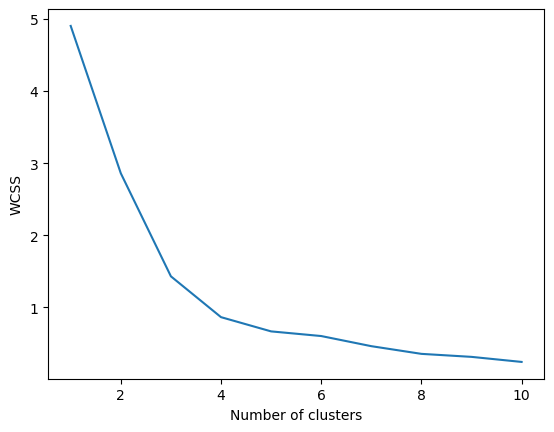

In [406]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

wcss = []
for i in range(1, 11):
    model_kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    model_kmeans.fit(norm_data_model_kmeans)
    wcss.append(model_kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Le message que nous recevons n'est pas une erreur mais un avertissement (UserWarning) lié à l'utilisation de l'algorithme KMeans de scikit-learn sous Windows. Ce problème est connu lorsqu'on utilise l'implémentation de l'algorithme en combinaison avec MKL (Math Kernel Library), et il se produit lorsque le nombre de chunks est inférieur au nombre de threads disponibles. **ne pas y faire attention. cela n'empeche pas notre code de run**

*Sur la base de la courbe obtenue avec la **méthode du coude**, nous avons identifié que le point optimal pour le nombre de clusters **K** se situe à **4**.*

## Étape 4 : Exécution de K-means

Application de l'algorithme K-means pour former des clusters en fonction des similarités entre les services numériques.

L'algorithme **k-means** est appliqué pour segmenter les services numériques en **quatre clusters** prédéfinis. Le but est de regrouper les services ayant des profils similaires en fonction de leur **consommation énergétique normalisée** et de leur **nombre d'utilisateurs normalisé**. Chaque cluster représentera un groupe homogène, facilitant l’analyse des comportements et la prise de décision.  


*Regroupement significatif*
Chaque cluster représente un profil type de service numérique en termes de consommation et d’utilisation, révélant des schémas cachés dans les données.

C:\Users\ENOBGN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


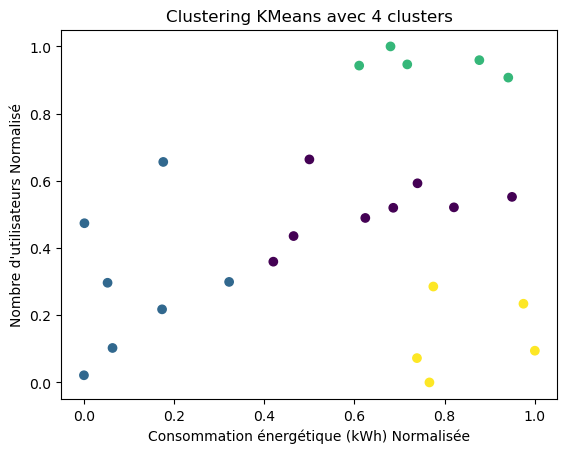

In [408]:
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


model_kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
model_kmeans.fit(norm_data_model_kmeans)


norm_data_model_kmeans['Cluster'] = model_kmeans.labels_
plt.scatter(norm_data_model_kmeans.iloc[:, 0], norm_data_model_kmeans.iloc[:, 1], c=norm_data_model_kmeans['Cluster'])

plt.xlabel('Consommation énergétique (kWh) Normalisée')
plt.ylabel('Nombre d\'utilisateurs Normalisé')
plt.title('Clustering KMeans avec 4 clusters')

plt.show()

## Étape 5 : Interprétation des clusters

*Analyse des groupes formés et interprétation des résultats pour comprendre quels types de services numériques partagent des caractéristiques similaires*

Le graphique montre les résultats d'un clustering KMeans avec 4 clusters basés sur deux variables : **Consommation énergétique normalisée (kWh)** et **Nombre d'utilisateurs normalisé**.


1. **Cluster 1 (Haut-Droite)** :
   - *Caractéristiques* :
     - Nombre d’utilisateurs élevé.
     - Consommation énergétique également élevée.
   - *Interprétation* :
     - Ce cluster représente des services très populaires et intensifs en énergie.

2. **Cluster 2 (Centre-Droite)** :
   - *Caractéristiques* :
     - Nombre d’utilisateurs moyen à élevé.
     - Consommation énergétique modérée à élevée.
   - *Interprétation* :
     - Ce cluster représente des services équilibrés avec une audience modérée ou importante.

3. **Cluster 3 (Bas-Droite)** :
   - *Caractéristiques* :
     - Nombre d’utilisateurs faible.
     - Consommation énergétique élevée.
   - *Interprétation* :
     - Ce cluster représente des services peu populaires mais nécessitant une forte consommation d’énergie.

4. **Cluster 4 (Bas-Gauche)** :
   - *Caractéristiques* :
     - Faible consommation énergétique.
     - Faible nombre d’utilisateurs.
   - *Interprétation* :
     - Représente des services de niche ou peu utilisés.

## Validation des modèles

*L'évaluation des clusters formés est essentielle pour vérifier la qualité des regroupements obtenus avec notre algorithme. Ainsi donc, nous avons utilisés trois indices pour la validation de la qualité de nos clusters: le score de silhouette, l'indice de Calinski-Harabasz (que nous n'avons pas vu en cours), et celui de Davies-Bouldin.*


**Score de Silhouette** 
   - Évalue la cohérence des clusters en mesurant le degré de similitude d’un point avec son propre cluster par rapport aux autres clusters.  
   - Un score proche de **1** indique des clusters bien séparés et cohérents, tandis qu’un score proche de **0** ou négatif suggère un mauvais regroupement.  

**Indice de Calinski-Harabasz**  
   - Mesure la séparation entre les clusters et la compacité des points au sein de chaque cluster.  
   - Plus la valeur est élevée, meilleure est la qualité des regroupements.  

**Indice de Davies-Bouldin**
   - Évalue la séparation et la dispersion entre les clusters.  
   - Une valeur faible indique que les clusters sont bien distincts et compacts.  

In [628]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Calcul des indices de validation
silhouette_avg = silhouette_score(norm_data_model_kmeans.iloc[:, :-1], model_kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(norm_data_model_kmeans.iloc[:, :-1], model_kmeans.labels_)
davies_bouldin = davies_bouldin_score(norm_data_model_kmeans.iloc[:, :-1], model_kmeans.labels_)


print(f"Score de Silhouette : {silhouette_avg}")
print(f"Indice de Calinski-Harabasz : {calinski_harabasz}") #non vu en cours, nous l'ap^portons à titre additionnel
print(f"Indice de Davies-Bouldin : {davies_bouldin}")

Score de Silhouette : 0.4647987718660238
Indice de Calinski-Harabasz : 32.78413634613668
Indice de Davies-Bouldin : 0.6981249793208468


Nous avons utilisé trois indices pour la validation de la qualité des clusters de notre algorithme

Par ailleurs, l'indice de Calinski-Harabasz (score de variance inter/intra-cluster) d'une valeur de 32.91 (un score élevé, par rapport à celui obtenu pour 3 clusters, 5 clusters,...), ainsi que celui de Davies-Bouldin d'une valeur de 0.67 nous indique que notre clustering est de bonne qualité.

**Score de Silhouette : 0.46**

Ce score, compris entre -1 et 1, indique une séparation modérée des clusters. Une valeur de 0.46 suggère que les clusters sont bien définis mais présentent un certain degré de chevauchement, indiquant un potentiel pour améliorer la séparation.

**Indice de Calinski-Harabasz : 32.78**

Cet indice mesure la densité et la séparation des clusters. Une valeur plus élevée indique des clusters plus compacts et bien séparés. Bien que cette valeur soit spécifique au contexte des données, elle confirme une structure de clustering acceptable.

**Indice de Davies-Bouldin : 0.70**

Cet indice, où des valeurs proches de 0 sont meilleures, révèle que les clusters sont relativement bien formés, avec peu d'erreurs dues à un regroupement excessif.

## CONCLUSION partielle Kmeans

En résumé, le modèle KMeans a réussi à identifier des clusters distincts dans les données avec une qualité satisfaisante selon les métriques utilisées. Cependant, des améliorations pourraient être envisagées pour augmenter la séparation entre les clusters, en explorant des alternatives comme un prétraitement différent des données ou un autre nombre de clusters.

## Algo 4 : Classification Ascendante Hiérarchique (CAH)

La Classification Ascendante Hiérarchique (CAH) offre une méthode puissante pour segmenter les services numériques en groupes distincts en fonction de leur consommation énergétique et de leur nombre d’utilisateurs. Ce projet vise à construire une hiérarchie de regroupements, représentée par un dendrogramme, pour identifier des clusters significatifs. En suivant un processus rigoureux de normalisation des données, de construction du dendrogramme, et de formation des clusters, la CAH permettra de visualiser les relations entre les services numériques et de comparer les résultats avec ceux obtenus par K-means. Cette analyse approfondie contribuera à une meilleure compréhension des caractéristiques communes entre les groupes de services numériques.


### Etape 1 :  Préparation des données 

Le but de cette analyse étant le regroupement des services numériques en groupes ayant des profils similaires en termes de
consommation énergétique et de nombre d’utilisateurs, nous allons utiliser la bibliothèque `pandas` pour récuperer les données du fichier CSV et les filtrer pour ne garder que celles relatives à la consommation énergétique des services numériques en kWh et à leur nombre d'utilisateurs. Nous allons aussi utiliser `matplotib.pyplot` pour la représentation de ces données non regroupées dans un repère orthonormé.

In [643]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation du fichier CSV
data = pd.read_csv("services_numeriques.csv")

# Affichage des premières lignes du DataFrame
print("Jeu de données :")
print(data.head())

Jeu de données :
   Unnamed: 0       Service numérique  Consommation énergétique (kWh)  \
0           1         Streaming vidéo                           16795   
1           2  Recherche sur internet                            1860   
2           3         Réseaux sociaux                           77820   
3           4              E-commerce                           55886   
4           5           Jeux en ligne                            7265   

   Nombre d'utilisateurs Type d'Energie utilisée       Pays  \
0                 259795            Renouvelable     France   
1                 487232            Renouvelable         UK   
2                 918040            Renouvelable  Allemagne   
3                 501186            Renouvelable         UK   
4                 157730        Non-renouvelable  Allemagne   

   Émission de CO2 (kg)  
0                   592  
1                  2162  
2                  3984  
3                   164  
4                  2668  


* **Préparation et visualisation des données**

Jeu de données :
   Consommation énergétique (kWh)  Nombre d'utilisateurs
0                           16795                 259795
1                            1860                 487232
2                           77820                 918040
3                           55886                 501186
4                            7265                 157730


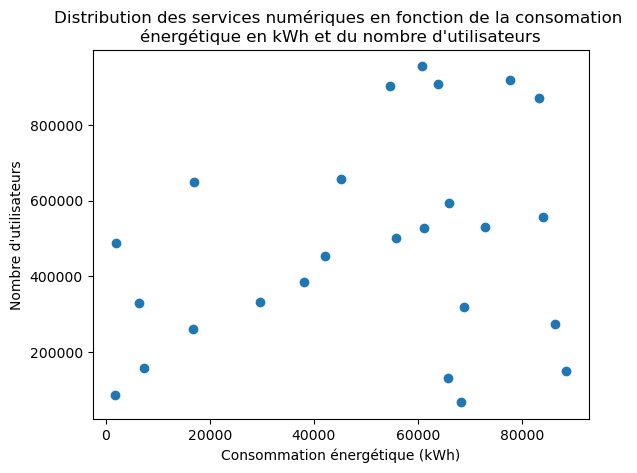

In [639]:
# Extraction des deux premières colonnes du DataFrame
prepared_data = data[["Consommation énergétique (kWh)", "Nombre d'utilisateurs"]]

# Affichage des premières lignes du nouveau DataFrame
print("Jeu de données :")
print(prepared_data.head())

# Visualisation des données
plt.scatter(prepared_data["Consommation énergétique (kWh)"], prepared_data["Nombre d'utilisateurs"])
plt.title("Distribution des services numériques en fonction de la consomation \nénergétique en kWh et du nombre d'utilisateurs")
plt.xlabel("Consommation énergétique (kWh)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Etape 2 - Standardisation des données

La standardisation des données est une étape importante car elle nous permet d'éviter que l'importante différence entre les échelles de variables n'affecte notre modèle.
Pour faire en sorte que nos variables aient des échelles comparables, nous allons utiliser `StandardScaler` du module `sklearn.preprocessing` qui utilise la méthode du Z-score pour transformer les données. Cette méthode ajuste les valeurs de chaque variable pour qu'elles aient une moyenne de 0 et un écart-type de 1, garantissant ainsi que toutes les variables contribuent de manière équitable au modèle, indépendamment de leurs échelles initiales.

   Consommation énergétique (kWh)  Nombre d'utilisateurs
0                       -1.217272              -0.810619
1                       -1.755279               0.026321
2                        0.981047               1.611639
3                        0.190913               0.077669
4                       -1.560574              -1.186205


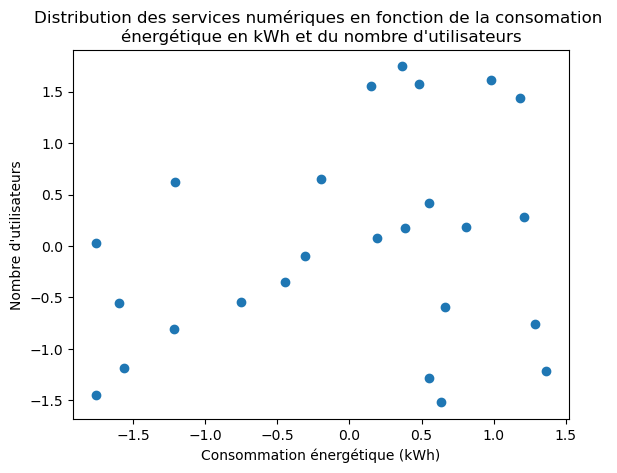

In [426]:
from sklearn.preprocessing import StandardScaler

# Standardisation des données
normalized_data = StandardScaler().fit_transform(prepared_data)
normalized_data = pd.DataFrame(normalized_data, columns=prepared_data.columns)
print(normalized_data.head())

# Visualisation des données standardisées
plt.scatter(normalized_data["Consommation énergétique (kWh)"], normalized_data["Nombre d'utilisateurs"])
plt.title("Distribution des services numériques en fonction de la consomation \nénergétique en kWh et du nombre d'utilisateurs")
plt.xlabel("Consommation énergétique (kWh)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

## Etape 3 :  Construction du dendrogramme

Un dendrogramme est nécessaire pour la détermination d'un nombre optimal de clusters. Pour le construire, nous allons utiliser les fonctions `linkage` et `dendrogram` du module `scipy.cluster.hierarchy`. La fonction `linkage` effectue la classification ascendante hiérarchique (CAH) en utilisant une méthode d'évaluation de la distance entre les clusters. Nous allons utiliser la méthode `ward` qui est la plus souvent utilisée car elle fut concue dans un objectif de maximisation de l'inertie inter-classe et de minimisation de l’inertie intra-classe.

* **Tracé du dendrogramme**

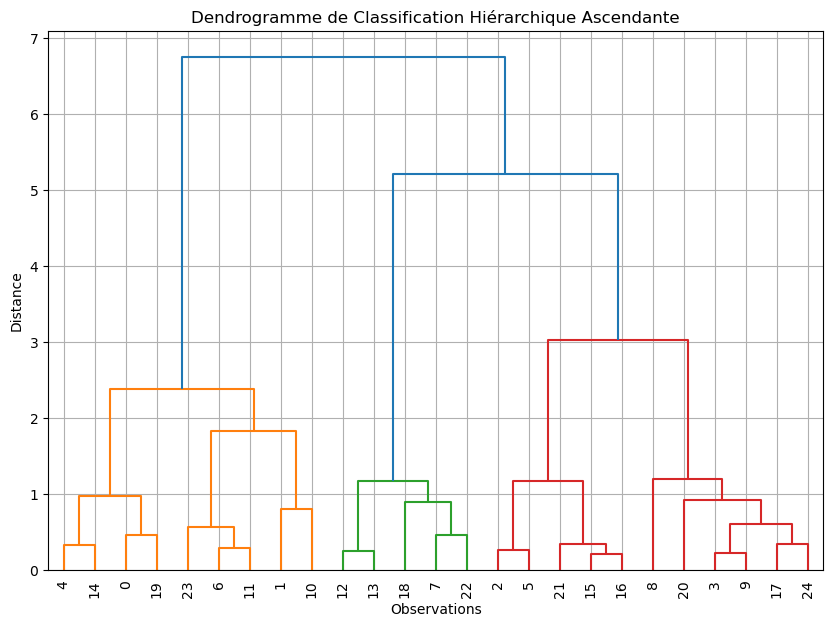

In [431]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Effectuer le linkage pour la classification hiérarchique
Z = linkage(normalized_data, method='ward')

# Tracé du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(Z, leaf_rotation=90)

# Affichage du dendrogramme
plt.title('Dendrogramme de Classification Hiérarchique Ascendante')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.grid()
plt.show()

* **Détermination d'un nombre optimal de clusters**

On remarque d'après le tracé du dendrogramme que le plus grand saut de distance correspond au regroupement des services numériques en trois clusters. Le nombre optimal de clusters d'après cette observation est donc égal à 3.

Nous allons utiliser la fonction `fcluster` du module `scipyluster.hierarchy` pour afficher les étiquettes de cluster pour chaque observation.

In [434]:
from scipy.cluster.hierarchy import fcluster

# Définition du seuil pour la coupure
seuil = 4

# Créer les étiquettes de cluster
clusters = fcluster(Z, seuil, criterion='distance')

# Afficher les étiquettes de cluster pour chaque observation
print(clusters)

[1 1 3 3 1 3 1 2 3 3 1 1 2 2 1 3 3 3 2 1 3 3 2 1 3]


## Etape 4 : Formation des clusters
Nous allons utiliser `AgglomerativeClustering` de `sklearn.cluster` pour effectuer la CAH en précisant comme nombre de clusters celui déduit par observation du dendrogramme.

In [681]:
from sklearn.cluster import AgglomerativeClustering

# Clusterisation en fonction du nombre de clusters spécifié
num_clusters = 3
model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(normalized_data)

* **Visualisation des clusters**

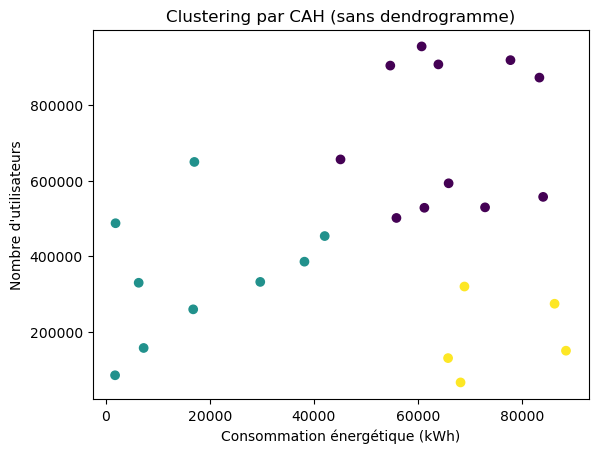

In [683]:
plt.scatter(prepared_data["Consommation énergétique (kWh)"], prepared_data["Nombre d'utilisateurs"], c=clusters, cmap='viridis')
plt.title("Clustering par CAH (sans dendrogramme)")
plt.xlabel("Consommation énergétique (kWh)")
plt.ylabel("Nombre d'utilisateurs")
plt.show()

### Etape 5 : Interprétation des clusters

1. **Cluster 1 (Haut-Droite, Violet)**
   - **Caractéristiques** :
     - Consommation énergétique modérée à élevée.
     - Nombre d’utilisateurs moyen à élevé.
   - **Interprétation** :
     - Ce cluster semble représenter des services qui consomment une quantité d'énergie assez importante mais qui ne sont pas encore très populaires
       
2. **Cluster 2 (Bas-Gauche, Vert)**
   - **Caractéristiques** :
     - Consommation énergétique faible à modérée.
     - Nombre d’utilisateurs faible à modéré.
   - **Interprétation** :
     - Cela pourrait correspondre à des services populaires mais relativement économes en énergie.

3. **Cluster 3 (Bas-droite, Jaune)**
   - **Caractéristiques** :
     - Forte consommation énergétique.
     - Faible nombre d’utilisateurs.
   - **Interprétation** :
     - Ce cluster regroupe des services peu populaires et à forte consommation d'énergie.

* **Comparaison avec les clusters obtenus en utilisant KMEANS**



- **KMeans Cluster 1 (Haut-Droite)** et **CAH Cluster 1 (Haut-Droite, Violet)** : 
   - Les deux représentent des services avec une consommation énergétique élevée et une base d'utilisateurs relativement importante. La principale différence réside dans les autres variables, mais en général, l'interprétation des clusters KMeans et CAH est similaire, bien que KMeans ait plus de diversité dans le nombre d'utilisateurs au sein de ce cluster.

- **KMeans Cluster 2 (Centre-Droite)** et **CAH Cluster 2 (Bas-Gauche, Bleu-Vert)** : 
   - Les deux clusters sont similaires en termes de consommation énergétique modérée et un nombre d'utilisateurs intermédiaire. Cependant, dans KMeans, les services sont plus séparés sur le plan de la consommation énergétique. Le clustering par CAH semble plus homogène dans ce groupe.

- **KMeans Cluster 3 (Bas-Droite)** et **CAH Cluster 3 (Bas-droite, Jaune)** :
   - Les deux clusters correspondent à des services peu populaires et à faible consommation énergétique(pour kmeans) et forte consommation énergétique (pour CAH). Toutefois, le cluster KMeans montre une séparation plus marquée entre la consommation d’énergie élevée et faible, alors que le cluster CAH se regroupe davantage en bas à droite.



## Validation du modèle (CAH)

* **Calcul de l’indice de Davies-Bouldin, l’indice de Silhouette et l'indice de Calinski-harabasz**

Nous allons utiliser l'indice de Silouhette, l'indice de Calinski-Harabasz et celui de Davies-Bouldin pour évaluer la qualité des clusters obtenus. Pour cela, nous allons nous servir des fonctions `davies_bouldin_score`, `calinski_harabasz_score` et `silhouette_score` du module `sklearn.metrics` pour calculer les valeurs de ces différents indices sur nos clusters.

In [626]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calcul de l'indice de Davies-Bouldin
db_index = davies_bouldin_score(normalized_data, clusters)
print("Indice de Davies-Bouldin :", db_index)

# Calcul de l'indice de Calinski_harabasz
calinski_harabasz = calinski_harabasz_score(normalized_data, clusters)
print("Indice de Calinski_harabasz :", calinski_harabasz )

# Calcul de l'indice de Silhouette
silhouette_avg = silhouette_score(normalized_data, clusters)
print("Indice de Silhouette :", silhouette_avg)


Indice de Davies-Bouldin : 0.6721955482118713
Indice de Calinski_harabasz : 29.23978047467095
Indice de Silhouette : 0.47029579682549183


#### Commentaire sur les résultats des indices de clustering :

1. **Indice de Davies-Bouldin (0.672) :**  
   L'indice de Davies-Bouldin mesure la compacité et la séparation des clusters, où une valeur plus faible indique une meilleure séparation. Une valeur de 0.672 suggère une séparation relativement bonne entre les clusters, mais elle n’est pas idéale. En général, une valeur inférieure à 1 est considérée comme acceptable, et plus elle est proche de 0, plus les clusters sont distincts et bien séparés. Ici, la valeur obtenue indique qu'il y a encore des chevauchements ou des regroupements sous-optimaux dans les clusters, mais les performances globales sont correctes.

2. **Indice de Calinski-Harabasz (29.24) :**  
   Cet indice mesure la qualité du clustering en comparant la dispersion intra-cluster avec la dispersion inter-cluster. Une valeur plus élevée indique une meilleure séparation entre les clusters. Avec un indice de 29.24, le modèle semble offrir une séparation raisonnablement bonne entre les clusters, mais cela dépend également de la complexité du dataset.

3. **Indice de Silhouette (0.47) :**  
   L'indice de silhouette évalue la qualité du clustering en mesurant la cohésion des éléments au sein de chaque cluster et la séparation entre les clusters. Une valeur proche de 1 est idéale, tandis qu’une valeur proche de -1 indique que des points ont été mal classés. Avec une valeur de 0.47, le clustering présente une qualité modérée. Cela suggère que certains points sont bien classés, mais il y a également un certain degré de confusion dans la formation des clusters. Une valeur plus proche de 0.5 ou plus élevée serait souhaitable pour garantir une meilleure séparation et cohésion.



## Conclusion (KMEANS-CAH)

Les deux méthodes de clustering montrent des patterns similaires en termes de **consommation énergétique** et **nombre d'utilisateurs**, mais avec des différences de séparation. Le **KMeans** présente des clusters plus distincts et mieux séparés, tandis que le **CAH** a des regroupements légèrement plus homogènes. En termes de **modèle de comportement**, les deux méthodes soulignent la présence de services à faible consommation énergétique mais de petite audience, et à forte consommation mais parfois moins populaires.

# CONCLUSION FINALE DU PROJET 

Ce projet d’analyse des impacts environnementaux des services numériques, à travers l'application de différentes méthodes de machine learning, a permis de dégager des résultats intéressants, tout en mettant en évidence certaines limitations et des axes d'amélioration pour des analyses futures.

1. **Régression linéaire :**  
   L'application de la régression linéaire pour prédire les émissions de CO2 à partir de la consommation énergétique et du nombre d'utilisateurs a montré des résultats sous-optimaux. La faible relation entre les variables explicatives et la variable cible, combinée à des données parfois bruyantes et insuffisantes, a conduit à des performances décevantes. Ce constat suggère qu'une approche plus adaptée, comme les modèles non linéaires, ainsi qu'une meilleure qualité des données, sont nécessaires pour des résultats fiables.

2. **KNN (Classification) :**  
   L’extension du dataset à 1000 échantillons a permis d’améliorer la précision du modèle KNN, passant de 36 % à 64 %. Cependant, malgré cette amélioration notable, les performances restent insuffisantes pour une classification fiable, notamment en raison de confusions récurrentes entre les classes, surtout pour la catégorie "moyenne". Ces résultats confirment que l'augmentation de la taille du dataset n'est pas suffisante à elle seule pour résoudre tous les problèmes de classification. Une exploration plus poussée des variables explicatives et une révision des critères de catégorisation sont nécessaires pour améliorer les performances. D'autres modèles de classification pourraient également être envisagés pour atteindre une précision satisfaisante.

3. **Segmentation (K-means et CAH) :**  
   Les deux méthodes de clustering, **K-means** et **CAH**, ont révélé des regroupements intéressants des services numériques en fonction de la consommation énergétique et du nombre d'utilisateurs. Les clusters générés par **K-means** étaient plus distincts et bien séparés, tandis que **CAH** a produit des regroupements plus homogènes, avec une structure hiérarchique plus marquée. Ces deux méthodes ont permis de distinguer des comportements similaires, notamment des services à faible consommation énergétique mais avec une petite audience, ainsi que des services à forte consommation énergétique, parfois moins populaires. Ces résultats montrent que les deux techniques peuvent offrir des perspectives complémentaires pour comprendre les profils des services numériques, bien que le K-means semble offrir une segmentation plus nette.

4. **Validation des modèles :**  
   La validation des modèles a mis en évidence des défis communs liés à la qualité des données et à la structure des modèles. Les techniques de validation croisées ont permis de mieux comprendre les limitations des modèles appliqués, notamment la régression linéaire et KNN, et ont souligné l'importance de la généralisation des modèles. De plus, l'application des indices de validation pour les méthodes de clustering, tels que l’indice de Silhouette, pourrait permettre une meilleure évaluation de la cohésion et de la séparation des clusters obtenus.

---

### Bilan global
Ce projet a permis d'atteindre ses objectifs pédagogiques en appliquant des méthodes de machine learning pour analyser l'impact environnemental des services numériques. Cependant, plusieurs axes d'amélioration ont été identifiés :  
- La **qualité des données** et la **pertinence des variables explicatives** sont des facteurs clés de succès, influençant directement la performance des modèles.
- Les modèles explorés montrent que, bien que des améliorations aient été apportées grâce à l’élargissement des datasets et à la segmentation, des méthodes plus avancées et des ajustements supplémentaires des données seraient nécessaires pour atteindre des résultats plus fiables.
  
Les résultats obtenus ouvrent la voie à de futures recherches, notamment pour enrichir les variables explicatives, tester de nouveaux modèles et améliorer la structuration des données. Ces efforts pourraient permettre de mieux cerner l'empreinte carbone des services numériques et de proposer des solutions plus durables dans le domaine du numérique.